# Informe - Estudio de caso: Análisis Exploratorio de Datos

La empresa A&A Ltda, empieza un proceso de implementación de Machine Learning, usted ha sido designado para una de las tareas más importante dentro del proyecto, el cual consisten en realizar el análisis exploratorio de los datos y documentar los resultados encontrados, generando un informe que involucre los procedimientos y los resultados.

El archivo que se analizara corresponde a precios de viviendas y locales para la venta y la colección de datos cuenta con variables que se ven involucradas en ese valor.

La información se encuentra en el siguiente enlace: https://www.datos.gov.co/Hacienda-y-Cr-dito-P-blico/Inmuebles-Disponibles-Para-La-Venta/72gd-px77/data  la cual usted debe descargar e importar con la herramienta anaconda, el archivo lo puede exportar en formato CSV.


La descarga del archivo se describe en la siguiente imagen:

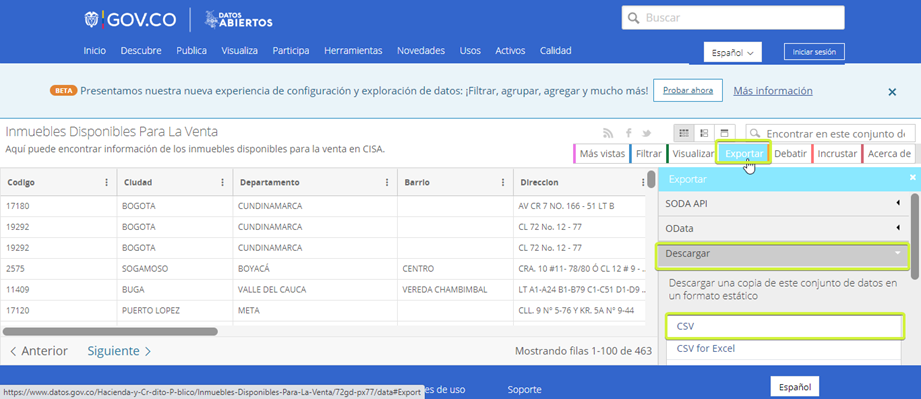

También puede encontrar el archivo en los anexos del curso.

### Importando Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Procedimiento para la importación del archivo en formato CSV

In [2]:
df = pd.read_csv('Data_Caso_Propuesto.csv')

### Planteamiento de una pregunta objetivo

¿Cuáles son los factores que más influyen en el precio de las viviendas y locales comerciales en Colombia?

### Total de registros

In [3]:
total_registros = len(df) #len - Permite saber el total de registros en las filas del dataframe
print(f"Total de registros {total_registros} filas.")

Total de registros 463 filas.


### Total de Filas y Columnas

In [4]:
total_registros = df.shape
print(f"Total de registros de filas: {total_registros[0]}")
print(f"Total de registros de columnas: {total_registros[1]}")
print(f"\nTotal de registros: {total_registros}")

Total de registros de filas: 463
Total de registros de columnas: 12

Total de registros: (463, 12)


### Detallado de cada columna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


### Identificar cuáles de las columnas son categóricas y numéricas

Las **columnas categóricas** son aquellas que contienen datos de tipo **object** o **category**.

In [6]:
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
print(f"Columnas categóricas: { columnas_categoricas }")
# print("Columnas categóricas:", columnas_categoricas)

Columnas categóricas: Index(['Ciudad', 'Departamento', 'Barrio', 'Direccion',
       'Detalle Disponibilidad', 'Estrato', 'Tipo de Inmueble',
       'Datos Adicionales'],
      dtype='object')


Las **columnas numéricas** son aquellas que contienen datos de tipo **int64** o **float64**

In [7]:
columnas_numericas = df.select_dtypes(include=['number']).columns
print(f"Columnas numéricas: { columnas_numericas }")

Columnas numéricas: Index(['Codigo', 'Area Terreno', 'Area Construida', 'Precio'], dtype='object')


### Identifique en que columnas existen valores nulos.

In [8]:
for column in df.columns:
    print(f"Columna: {column}")
    print(f"Tipos de datos: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")
    print(f"Valores no nulos: {df[column].notnull().sum()}")
    print(f"Valores nulos: {df[column].isnull().sum()}")

Columna: Codigo
Tipos de datos: int64
Valores únicos: 456
Valores no nulos: 463
Valores nulos: 0
Columna: Ciudad
Tipos de datos: object
Valores únicos: 43
Valores no nulos: 463
Valores nulos: 0
Columna: Departamento
Tipos de datos: object
Valores únicos: 14
Valores no nulos: 463
Valores nulos: 0
Columna: Barrio
Tipos de datos: object
Valores únicos: 17
Valores no nulos: 40
Valores nulos: 423
Columna: Direccion
Tipos de datos: object
Valores únicos: 456
Valores no nulos: 463
Valores nulos: 0
Columna: Area Terreno
Tipos de datos: float64
Valores únicos: 19
Valores no nulos: 463
Valores nulos: 0
Columna: Area Construida
Tipos de datos: float64
Valores únicos: 11
Valores no nulos: 463
Valores nulos: 0
Columna: Detalle Disponibilidad
Tipos de datos: object
Valores únicos: 6
Valores no nulos: 463
Valores nulos: 0
Columna: Estrato
Tipos de datos: object
Valores únicos: 9
Valores no nulos: 463
Valores nulos: 0
Columna: Precio
Tipos de datos: float64
Valores únicos: 223
Valores no nulos: 463
Va

Por medio de este ciclo **for** podemos identificar que en las unicas columas que existen valores nulos son: **Barrio(423)** y **Datos Adicionales(345)**

In [9]:
nulos_por_columna = df.isnull().sum()
nulos_por_columna

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Por medio de estas funciones, podemos ver de una forma más específica que sí existen valores nulos en las columnas: **Barrio** y **Datos Adicionales**.

Eliminando los valores nulos

In [10]:
eliminando_valores_nulos = df.dropna()
print(eliminando_valores_nulos)

     Codigo                  Ciudad     Departamento                Barrio  \
3      2575                SOGAMOSO           BOYACÁ                CENTRO   
37    12120        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
43    10106            BARRANQUILLA        ATLÁNTICO                CENTRO   
49    12117        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
54    12114        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
55    12113        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
57    13270               MANIZALES           CALDAS             EL CENTRO   
60    12112        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
68    12116        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
80    12121        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
86    11787  SANTANDER DE QUILICHAO            CAUCA  PARQUE IND CAUCADESA   
93    12115        CALIMA EL DARIEN  VALLE DEL CAUCA        VERE

In [11]:
df = eliminando_valores_nulos
df.info()

print(f"\nTotal de registros: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 3 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  23 non-null     int64  
 1   Ciudad                  23 non-null     object 
 2   Departamento            23 non-null     object 
 3   Barrio                  23 non-null     object 
 4   Direccion               23 non-null     object 
 5   Area Terreno            23 non-null     float64
 6   Area Construida         23 non-null     float64
 7   Detalle Disponibilidad  23 non-null     object 
 8   Estrato                 23 non-null     object 
 9   Precio                  23 non-null     float64
 10  Tipo de Inmueble        23 non-null     object 
 11  Datos Adicionales       23 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ KB

Total de registros: (23, 12)


In [12]:
df

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.00,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
37,12120,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 2,337995.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,5.171324e+09,LOTE VIVIENDA,"EXCELENTE LOTE CON VISTA AL LAGO CALIMA, UBICA..."
43,10106,BARRANQUILLA,ATLÁNTICO,CENTRO,CALLE 39 NO 43 58 62 LC 1,0.00,0.00,COMERCIALIZABLE CON RESTRICCION,DOS,7.303790e+08,LOCAL,DESEAS INVERTIR ESTA ES LA OPORTUNIDAD LOCAL E...
49,12117,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3B2,134000.00,763.06,COMERCIALIZABLE FIDUCIA,RURAL,3.027405e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
54,12114,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1B,175982.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.704525e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
55,12113,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 4,71143.00,745.33,COMERCIALIZABLE FIDUCIA,RURAL,2.700092e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
57,13270,MANIZALES,CALDAS,EL CENTRO,KR 22 # 29-31 LC S-8 CENTRO COMERCIAL PARQUE C...,0.00,91.47,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,8.375908e+08,LOCAL,LOCAL UBICADO EN EL CENTRO COMERCIAL PARQUE CA...
60,12112,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,RESERVA FORESTAL LT 1A,2187863.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.406650e+09,LOTE MIXTO,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
68,12116,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3B1,131627.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.237659e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
80,12121,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3A,109627.44,0.00,COMERCIALIZABLE FIDUCIA,RURAL,1.754039e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...


### Identifique si existen registros duplicados

In [13]:
duplicados = df[df.duplicated()]
print(duplicados)
duplicados

Empty DataFrame
Columns: [Codigo, Ciudad, Departamento, Barrio, Direccion, Area Terreno, Area Construida, Detalle Disponibilidad, Estrato, Precio, Tipo de Inmueble, Datos Adicionales]
Index: []


,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales


No existen registros duplicados por que cada uno tiene un código que los identifica.

In [14]:
# Número total de filas duplicadas en el dataframe
total_duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {total_duplicados}")

Cantidad de filas duplicadas: 0


No se va a eliminar ninguna fila que se encuentre duplicada por que como podemos ver no existen ninguna.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 3 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  23 non-null     int64  
 1   Ciudad                  23 non-null     object 
 2   Departamento            23 non-null     object 
 3   Barrio                  23 non-null     object 
 4   Direccion               23 non-null     object 
 5   Area Terreno            23 non-null     float64
 6   Area Construida         23 non-null     float64
 7   Detalle Disponibilidad  23 non-null     object 
 8   Estrato                 23 non-null     object 
 9   Precio                  23 non-null     float64
 10  Tipo de Inmueble        23 non-null     object 
 11  Datos Adicionales       23 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ KB


### Resumen Estadístico Básico

In [16]:
resume_estadistico = df.describe()
print("Resumen estadístico básico:\n")
print(resume_estadistico)

Resumen estadístico básico:

             Codigo  Area Terreno  Area Construida        Precio
count     23.000000  2.300000e+01        23.000000  2.300000e+01
mean   12634.260870  1.622327e+05       492.776522  1.770347e+09
std     3247.318491  4.558649e+05      1537.481264  2.936256e+09
min     2575.000000  0.000000e+00         0.000000  1.534802e+07
25%    12113.500000  0.000000e+00         0.000000  3.938667e+07
50%    12119.000000  3.073000e+03         0.000000  8.375908e+08
75%    12708.500000  1.206272e+05        45.735000  2.322155e+09
max    18959.000000  2.187863e+06      7269.000000  1.376828e+10


In [17]:
# Verificar tipos de datos esperados
print("Tipos de datos esperados:")
print(df.dtypes)


Tipos de datos esperados:
Codigo                      int64
Ciudad                     object
Departamento               object
Barrio                     object
Direccion                  object
Area Terreno              float64
Area Construida           float64
Detalle Disponibilidad     object
Estrato                    object
Precio                    float64
Tipo de Inmueble           object
Datos Adicionales          object
dtype: object


### Valores Erroneos


In [18]:
print(df['Area Terreno'].describe())

count    2.300000e+01
mean     1.622327e+05
std      4.558649e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.073000e+03
75%      1.206272e+05
max      2.187863e+06
Name: Area Terreno, dtype: float64


In [19]:
# Filtrando Valores Cero
valres_cero_area_terreno = df[df['Area Terreno'] == 0]
print("\nValores cero en la columna de 'Area Terreno':")
print(valres_cero_area_terreno)


Valores cero en la columna de 'Area Terreno':
     Codigo                  Ciudad     Departamento              Barrio  \
43    10106            BARRANQUILLA        ATLÁNTICO              CENTRO   
57    13270               MANIZALES           CALDAS           EL CENTRO   
105   18959               CARTAGENA          BOLÍVAR         ALTO BOSQUE   
106   18958               CARTAGENA          BOLÍVAR         ALTO BOSQUE   
124   12732                    CALI  VALLE DEL CAUCA  VEREDA EL SALADITO   
236   18871  SANTANDER DE QUILICHAO            CAUCA       VILLA DEL SUR   
458   12709                    CALI  VALLE DEL CAUCA    PRADOS DEL NORTE   
460   12708                    CALI  VALLE DEL CAUCA    PRADOS DEL NORTE   
461   12706                    CALI  VALLE DEL CAUCA    PRADOS DEL NORTE   
462   12707                    CALI  VALLE DEL CAUCA    PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
43                           CALLE 39 NO 43 

In [20]:
print(f"\nTotal de registros: {df.shape}")


Total de registros: (23, 12)


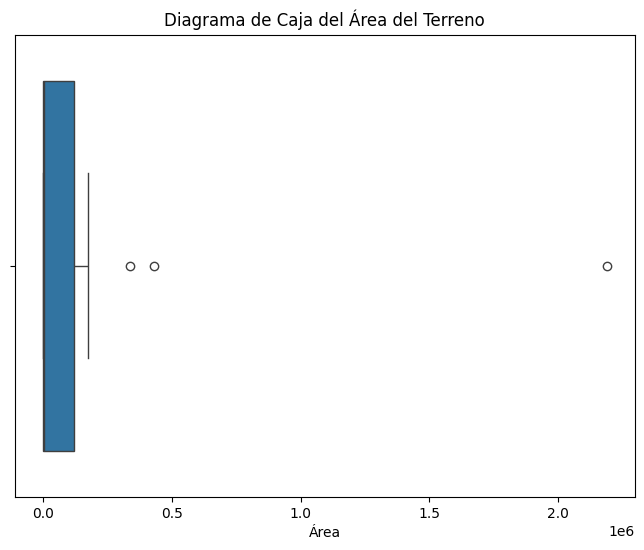

In [21]:
# Crear un BoxPlot - Crear un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Area Terreno'])
plt.title('Diagrama de Caja del Área del Terreno')
plt.xlabel('Área')
plt.show()


Text(0, 0.5, 'Frecuencia')

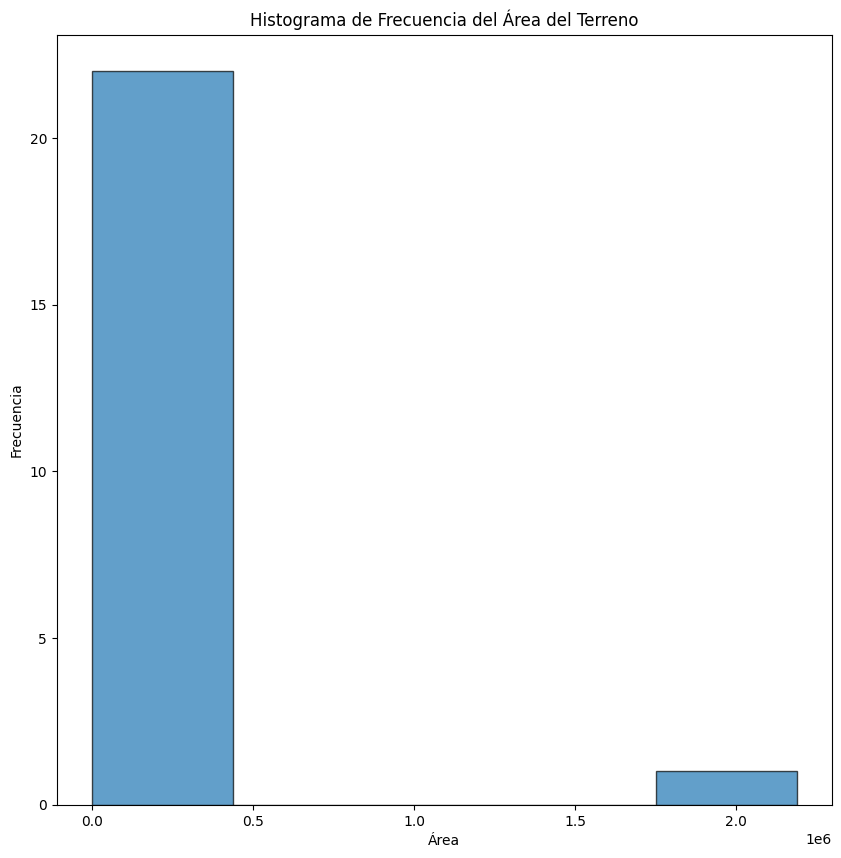

In [22]:
# Histograma de frecuencia
plt.figure(figsize=(10, 10))
plt.hist(df['Area Terreno'], bins=5, edgecolor='black', alpha=0.7)

plt.title('Histograma de Frecuencia del Área del Terreno')
plt.xlabel('Área')
plt.ylabel('Frecuencia')

### Eliminar Resgistros Con Area Terreno en cero (0).

In [23]:
df_limpio = df[df['Area Terreno'] != 0]
print("\nDataFrame después de eliminar registros con Area Terreno cero:")
print(df_limpio)


DataFrame después de eliminar registros con Area Terreno cero:
     Codigo                  Ciudad     Departamento                Barrio  \
3      2575                SOGAMOSO           BOYACÁ                CENTRO   
37    12120        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
49    12117        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
54    12114        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
55    12113        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
60    12112        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
68    12116        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
80    12121        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
86    11787  SANTANDER DE QUILICHAO            CAUCA  PARQUE IND CAUCADESA   
93    12115        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   
99    12119        CALIMA EL DARIEN  VALLE DEL CAUCA        VEREDA PALERMO   


In [24]:
df = df_limpio
df

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.00,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
37,12120,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 2,337995.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,5.171324e+09,LOTE VIVIENDA,"EXCELENTE LOTE CON VISTA AL LAGO CALIMA, UBICA..."
49,12117,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3B2,134000.00,763.06,COMERCIALIZABLE FIDUCIA,RURAL,3.027405e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
54,12114,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1B,175982.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.704525e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
55,12113,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 4,71143.00,745.33,COMERCIALIZABLE FIDUCIA,RURAL,2.700092e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
60,12112,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,RESERVA FORESTAL LT 1A,2187863.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.406650e+09,LOTE MIXTO,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
68,12116,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3B1,131627.00,0.00,COMERCIALIZABLE FIDUCIA,RURAL,2.237659e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
80,12121,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 3A,109627.44,0.00,COMERCIALIZABLE FIDUCIA,RURAL,1.754039e+09,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...
86,11787,SANTANDER DE QUILICHAO,CAUCA,PARQUE IND CAUCADESA,LT 8 ET I PARQUE INDUSTRIAL CAUCADESA,46126.00,0.00,COMERCIALIZABLE CON RESTRICCION,RURAL,1.416213e+09,LOTE INDUSTRIAL,"LOTE TERRENO NETO , EN PROINDIVISO, SEMI-URBAN..."
93,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1C,64000.00,700.00,COMERCIALIZABLE FIDUCIA,RURAL,1.042887e+09,LOTE VIVIENDA,LOTE DE TERRENO QUE HACE PARTE DEL PROYECTO CA...


### Determinando la correlación entre variables numéricas

In [25]:
# Seleccionar solo las columnas numéricas para el análisis
df_numerico = df.select_dtypes(include=['number'])

# Eliminar la columna 'ID'
df_numerico_sin_codigo = df_numerico.drop(columns=['Codigo'])
df_numerico_sin_codigo

,Area Terreno,Area Construida,Precio
3,1655.08,7269.00,1.376828e+10
37,337995.00,0.00,5.171324e+09
49,134000.00,763.06,3.027405e+09
54,175982.00,0.00,2.704525e+09
55,71143.00,745.33,2.700092e+09
60,2187863.00,0.00,2.406650e+09
68,131627.00,0.00,2.237659e+09
80,109627.44,0.00,1.754039e+09
86,46126.00,0.00,1.416213e+09
93,64000.00,700.00,1.042887e+09


In [26]:
# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_numerico_sin_codigo.corr()
print("Matriz de Correlación con solo variables numéricas:")
print(correlation_matrix)

Matriz de Correlación con solo variables numéricas:
                 Area Terreno  Area Construida    Precio
Area Terreno         1.000000        -0.210288 -0.067509
Area Construida     -0.210288         1.000000  0.877066
Precio              -0.067509         0.877066  1.000000


Interpretación de resultados:
- Área del Terreno y Área Construida (-0.210288):
    - El coeficiente de correlación es negativo y cercano a cero. Esto sugiere una relación lineal débil y negativa entre estas dos variables.
    - En otras palabras, a medida que aumenta el área del terreno, no necesariamente aumenta de manera proporcional el área construida, y viceversa. Podría haber propiedades con    terrenos extensos pero pequeñas construcciones, o viceversa.
- Área del Terreno y Precio (-0.067509):
    - El coeficiente de correlación es nuevamente negativo pero aún más cercano a cero.
    - Esto indica una relación lineal muy débil y negativa entre el área del terreno y el precio.
    - En términos prácticos, esto significa que el tamaño del terreno no es un fuerte predictor del precio de la propiedad. Otros factores como la ubicación, las características de la construcción, etc., podrían tener una mayor influencia en el precio.
- Área Construida y Precio (0.877866):
    - El coeficiente de correlación es positivo y cercano a 1.
    - Esto indica una fuerte relación lineal positiva entre el área construida y el precio.
    - Es decir, a medida que aumenta el área construida de una propiedad, su precio tiende a aumentar significativamente. Esta relación es lógica, ya que propiedades con mayor área construida suelen ofrecer más comodidades y espacios, lo cual se refleja en un precio más elevado.

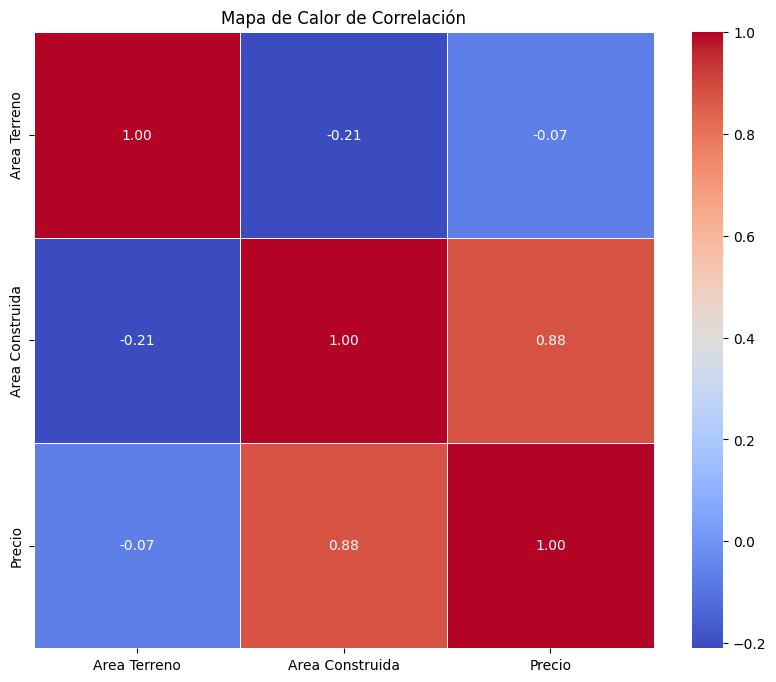

In [27]:
# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

### Columnas que no me aportan

In [28]:
columnas = df.columns
print(f"Nombres de las columnas: {columnas}")

Nombres de las columnas: Index(['Codigo', 'Ciudad', 'Departamento', 'Barrio', 'Direccion',
       'Area Terreno', 'Area Construida', 'Detalle Disponibilidad', 'Estrato',
       'Precio', 'Tipo de Inmueble', 'Datos Adicionales'],
      dtype='object')


Para no escribir como tal las columnas que considero que no aportan de acuerdo con mi pregunta objetivo por que son bastantes, mejor nombrare las dos que considero que si son importantes: **Area Construida** y **Precio** debido a que tiene correlación.

### Agrupando Columns para el analisis

In [29]:
# Agrupar por 'Ciudad' y calcular la media de 'Area Construida' y 'Precio'
df_agrupado = df.groupby('Ciudad')[['Area Construida', 'Precio']].mean()

print("DataFrame agrupado por Ciudad con medias de Edad y Salario:")
print(df_agrupado)

DataFrame agrupado por Ciudad con medias de Edad y Salario:
                        Area Construida        Precio
Ciudad                                               
CALI                              0.000  1.667784e+09
CALIMA EL DARIEN                397.339  2.190472e+09
SANTANDER DE QUILICHAO            0.000  1.416213e+09
SOGAMOSO                       7269.000  1.376828e+10


Creando un DataFrame Limpio Sin Valores Nulos, Atípicos.

In [30]:
# df.to_csv('data_caso_propuesto_limpio.csv', index=False)
# print("El DataFrame limpio se ha guardado en 'data_caso_propuesto.csv'")

### Conclusión


Respondiendo a la pregunta formulada al inicio de este artículo, podemos decir que el factor más importante que incide en el precio de las casas y locales comerciales en Colombia es el área del inmueble en metros cuadrados. Existe una fuerte relación directa entre la superficie y el precio, lo que indica que cuanto mayor es el espacio, mayor es el valor de mercado. Un coeficiente de correlación positivo cercano a 1 refleja un crecimiento proporcional en superficie y precio, lo que es consistente con la intuición del mercado inmobiliario. Las propiedades más grandes suelen ofrecer más comodidades y espacio y, por lo tanto, tienen un precio más alto.

Esta conexión entre tamaño y precio tiene varias implicaciones prácticas. En primer lugar, los metros cuadrados son cruciales a la hora de tasar una propiedad. Las propiedades más grandes tienden a tener precios más altos;Además, la alta correlación indica la demanda continua de propiedades más grandes en el mercado inmobiliario colombiano. Para los compradores, el tamaño puede ser un factor decisivo en la decisión de compra, especialmente para aquellos que están dispuestos a pagar más. Por otro lado, los inversores pueden considerar propiedades con potencial de ampliación o renovación para aumentar su valor de mercado.

Además del tamaño, otros factores pueden influir en los precios de las propiedades. La ubicación es crucial; las propiedades en zonas céntricas o bien ubicadas tienden a ser más caras. El estado y la antigüedad de la propiedad también juegan un papel importante, al igual que comodidades adicionales como piscinas, jardines y plazas de aparcamiento. Las tendencias del mercado local y las condiciones económicas también afectan los precios. Juntos, estos factores proporcionan una comprensión más completa del mercado inmobiliario.







